In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import tensorflow as tf
import scipy.io 
import time
import random
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

tf.config.threading.set_intra_op_parallelism_threads(1)
tf.config.threading.set_inter_op_parallelism_threads(1)

In [85]:
xmin, xmax = 0.0, 2.0
zmin, zmax = 0.0, 2.0

In [117]:
T_pred = np.load('./pinn_output/2segments.npy')
T_pred = np.rot90(T_pred, k=2)
T_nes = np.load('./nes_output/2segments_nes.npy')
T_nes = np.rot90(T_nes, k=3)

In [115]:
# Load fast sweeping traveltims for comparison

T_fsm = np.load("C:/Users/dung2/Downloads/2segments_fmm (3).npy")
T_fsm = np.rot90(T_fsm, k=1)

In [96]:
print('MAE', abs(T_nes - T_fsm).mean())
print('RMAE', abs(T_nes - T_fsm).mean() / T_fsm.mean() * 100, '%')

print('MAE PINN', abs(T_pred - T_fsm).mean())
print('RMAE PINN', abs(T_pred - T_fsm).mean() / T_fsm.mean() * 100, '%')

MAE 0.0008600755421489506
RMAE 0.43554640233586744 %
MAE PINN 0.05161678252185679
RMAE PINN 26.138987595643297 %


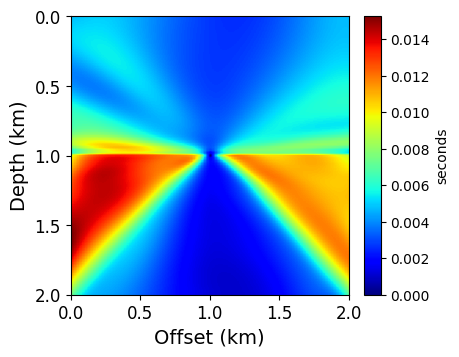

In [119]:
# Plot the computed tau

plt.style.use('default')

plt.figure(figsize=(4,4))

ax = plt.gca()
im = ax.imshow(np.abs(T_pred-T_fsm), extent=[xmin,xmax,zmax,zmin], aspect=1, cmap="jet")

plt.xlabel('Offset (km)', fontsize=14)
plt.xticks(fontsize=12)

plt.ylabel('Depth (km)', fontsize=14)
plt.yticks(fontsize=12)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.15)

cbar = plt.colorbar(im, cax=cax)

#cbar.mappable.set_clim(0,0.0006)

cbar.set_label('seconds',size=10)
cbar.ax.tick_params(labelsize=10)

plt.savefig("./pinn_error/2segments.pdf", format='pdf', bbox_inches="tight")

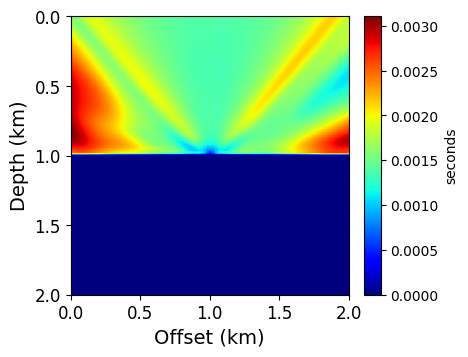

In [98]:
# Plot the computed tau

plt.style.use('default')

plt.figure(figsize=(4,4))

ax = plt.gca()
im = ax.imshow(np.abs(T_nes-T_fsm), extent=[xmin,xmax,zmax,zmin], aspect=1, cmap="jet")

plt.xlabel('Offset (km)', fontsize=14)
plt.xticks(fontsize=12)

plt.ylabel('Depth (km)', fontsize=14)
plt.yticks(fontsize=12)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.15)

cbar = plt.colorbar(im, cax=cax)

#cbar.mappable.set_clim(0,0.0006)

cbar.set_label('seconds',size=10)
cbar.ax.tick_params(labelsize=10)

plt.savefig("./nes_error/2segments.pdf", format='pdf', bbox_inches="tight")